# 03_Assets_Liabilities_Analysis.ipynb

## Title: "Assets Liabilities Assessment"

### Contents:

- Analyzing Assets and Liabilities metrics from SEC data.
- Comparing with assets_liabilities_query.sql results.
- Calculating debt ratios and solvency measures.
- Visualizations and debt profile analysis.

---

# Set Up the Environment

## Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [15]:
from prepare_and_sort_data_quarterly import prepare_and_sort_financial_data

# Load Data

## Load Data from CSV File

In [16]:
raw_data = pd.read_csv('combined_df.csv')

In [17]:
# Inspect the first few rows of the dataset
raw_data.head(5)

,EntityName,CIK,Metric,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN
1,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,0001193125-09-210918,2009,Q3,10-Q,2009-10-21,NaN
2,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,0001193125-10-024406,2009,FY,10-K,2010-02-08,CY2008Q4I
3,THE BOEING COMPANY,12927,Assets,2009-06-30,57712000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,CY2009Q2I
4,THE BOEING COMPANY,12927,Assets,2009-09-30,58667000000,0001193125-09-210918,2009,Q3,10-Q,2009-10-21,CY2009Q3I


In [18]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [19]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  278 non-null    object        
 1   CIK         278 non-null    int64         
 2   Metric      278 non-null    object        
 3   end         278 non-null    datetime64[ns]
 4   val         278 non-null    int64         
 5   accn        278 non-null    object        
 6   fy          278 non-null    int64         
 7   fp          278 non-null    object        
 8   form        278 non-null    object        
 9   filed       278 non-null    object        
 10  frame       144 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 24.0+ KB


# Individual Metrics Analysis

## Analysis of Assets

In [20]:
# Filter out the Assets
assets = raw_data[raw_data['Metric'] == 'Assets']

In [21]:
assets_data = prepare_and_sort_financial_data(raw_data, 'Assets')

In [23]:
assets_data.head(10)

,EntityName,CIK,Metric,end,val,year,quarter
2,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,2008,Q4
3,THE BOEING COMPANY,12927,Assets,2009-06-30,57712000000,2009,Q2
4,THE BOEING COMPANY,12927,Assets,2009-09-30,58667000000,2009,Q3
9,THE BOEING COMPANY,12927,Assets,2009-12-31,62053000000,2009,Q4
10,THE BOEING COMPANY,12927,Assets,2010-03-31,62970000000,2010,Q1
11,THE BOEING COMPANY,12927,Assets,2010-06-30,63755000000,2010,Q2
12,THE BOEING COMPANY,12927,Assets,2010-09-30,65222000000,2010,Q3
17,THE BOEING COMPANY,12927,Assets,2010-12-31,68565000000,2010,Q4
18,THE BOEING COMPANY,12927,Assets,2011-03-31,68760000000,2011,Q1
19,THE BOEING COMPANY,12927,Assets,2011-06-30,72119000000,2011,Q2


In [24]:
print(assets_data.describe())

           CIK                            end           val
count     59.0                             59  5.900000e+01
mean   12927.0  2016-06-28 15:51:51.864406784  1.037422e+11
min    12927.0            2008-12-31 00:00:00  5.377900e+10
25%    12927.0            2012-11-15 00:00:00  8.627500e+10
50%    12927.0            2016-06-30 00:00:00  9.292100e+10
75%    12927.0            2020-02-14 12:00:00  1.339530e+11
max    12927.0            2023-09-30 00:00:00  1.628720e+11
std        0.0                            NaN  2.950007e+10


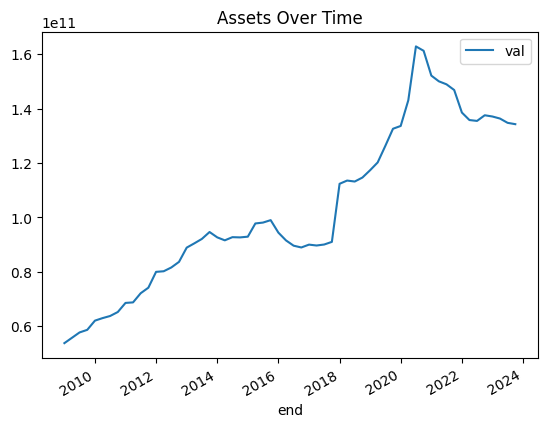

In [25]:
assets_data.plot(x='end', y='val', title='Assets Over Time')
plt.show()

## Analysis of Stockholders Equity

In [26]:
stockholders_equity = raw_data[raw_data['Metric'] == 'StockholdersEquity']

In [28]:
stockholders_equity_data = prepare_and_sort_financial_data(raw_data, 'StockholdersEquity')

In [29]:
stockholders_equity_data.head(5)

,EntityName,CIK,Metric,end,val,year,quarter
164,THE BOEING COMPANY,12927,StockholdersEquity,2008-12-31,-1294000000,2008,Q4
165,THE BOEING COMPANY,12927,StockholdersEquity,2009-06-30,180000000,2009,Q2
166,THE BOEING COMPANY,12927,StockholdersEquity,2009-09-30,-1028000000,2009,Q3
171,THE BOEING COMPANY,12927,StockholdersEquity,2009-12-31,2128000000,2009,Q4
172,THE BOEING COMPANY,12927,StockholdersEquity,2010-03-31,2942000000,2010,Q1


           CIK                            end           val
count     59.0                             59  5.900000e+01
mean   12927.0  2016-06-28 15:51:51.864406784 -1.094593e+09
min    12927.0            2008-12-31 00:00:00 -1.831600e+10
25%    12927.0            2012-11-15 00:00:00 -9.141000e+09
50%    12927.0            2016-06-30 00:00:00  1.086000e+09
75%    12927.0            2020-02-14 12:00:00  5.835500e+09
max    12927.0            2023-09-30 00:00:00  1.487500e+10
std        0.0                            NaN  9.465670e+09


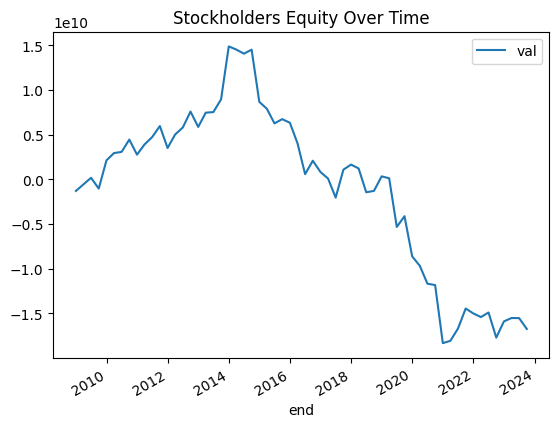

In [30]:
print(stockholders_equity_data.describe())
stockholders_equity_data.plot(x='end', y='val', title='Stockholders Equity Over Time')
plt.show()


## Analysis of Liabilities

In [31]:
# Filter out the Liabilities data
liabilities_loss = raw_data[raw_data['Metric'] == 'Liabilities']

In [32]:
liabilities_data = prepare_and_sort_financial_data(raw_data, 'Liabilities')

In [18]:
liabilities_data.head(5)

,EntityName,CIK,Metric,end,val,year,quarter
117,THE BOEING COMPANY,12927,Liabilities,2009-12-31,59828000000,2009,Q4
118,THE BOEING COMPANY,12927,Liabilities,2010-06-30,60582000000,2010,Q2
119,THE BOEING COMPANY,12927,Liabilities,2010-09-30,60670000000,2010,Q3
122,THE BOEING COMPANY,12927,Liabilities,2010-12-31,65703000000,2010,Q4
123,THE BOEING COMPANY,12927,Liabilities,2011-06-30,67295000000,2011,Q2


           CIK                            end           val
count     26.0                             26  2.600000e+01
mean   12927.0  2017-11-17 23:04:36.923076864  1.233592e+11
min    12927.0            2009-12-31 00:00:00  5.982800e+10
25%    12927.0            2012-01-22 18:00:00  7.523950e+10
50%    12927.0            2020-08-15 00:00:00  1.506340e+11
75%    12927.0            2022-03-08 12:00:00  1.547442e+11
max    12927.0            2023-09-30 00:00:00  1.742540e+11
std        0.0                            NaN  4.501617e+10


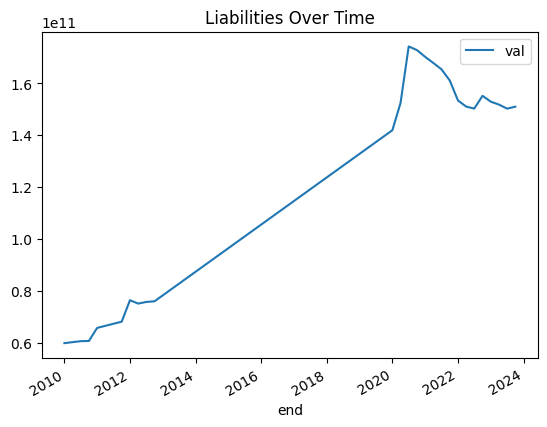

In [33]:
print(liabilities_data.describe())
liabilities_data.plot(x='end', y='val', title='Liabilities Over Time')
plt.show()


# Merge the Data

In [34]:
df_merged = pd.merge(assets_data, stockholders_equity_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_assets', '_stockholders_equity'))

In [36]:
df_merged = pd.merge(df_merged, liabilities_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer')
                     

In [37]:
df_merged.rename(columns={'val_assets': 'Assets', 
                          'val_stockholders_equity': 'StockholdersEquity', 
                          'val': 'Liabilities'}, inplace=True)

In [38]:
df_merged.head(5)

,EntityName,CIK,Metric_assets,end,Assets,year,quarter,Metric_stockholders_equity,StockholdersEquity,Metric,Liabilities
0,THE BOEING COMPANY,12927,Assets,2008-12-31,53779000000,2008,Q4,StockholdersEquity,-1294000000,NaN,NaN
1,THE BOEING COMPANY,12927,Assets,2009-06-30,57712000000,2009,Q2,StockholdersEquity,180000000,NaN,NaN
2,THE BOEING COMPANY,12927,Assets,2009-09-30,58667000000,2009,Q3,StockholdersEquity,-1028000000,NaN,NaN
3,THE BOEING COMPANY,12927,Assets,2009-12-31,62053000000,2009,Q4,StockholdersEquity,2128000000,Liabilities,5.982800e+10
4,THE BOEING COMPANY,12927,Assets,2010-03-31,62970000000,2010,Q1,StockholdersEquity,2942000000,NaN,NaN


# Calculation

**Assets and Liabilities:**
    
    - `Assets`
    - `Liabilities`
    - `StockholdersEquity` (Equity)
    - **Calculation:** To assess financial health, compare total assets against total liabilities. The equity figure provides additional context.

In [39]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [40]:
# Convert financial values from cents to millions for readability
df_final['Assets'] /= 1000000
df_final['StockholdersEquity'] /= 1000000
df_final['Liabilities'] /= 1000000

In [41]:
# Calculate Asset to Liability Ratio and Debt to Equity Ratio where data is available
df_final['AssetToLiabilityRatio'] = df_final.apply(lambda row: row['Assets'] / row['Liabilities'] if pd.notna(row['Liabilities']) else None, axis=1)
df_final['DebtToEquityRatio'] = df_final.apply(lambda row: row['Liabilities'] / row['StockholdersEquity'] if pd.notna(row['Liabilities']) and pd.notna(row['StockholdersEquity']) else None, axis=1)


In [42]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'Assets', 'Liabilities', 'StockholdersEquity', 'AssetToLiabilityRatio', 'DebtToEquityRatio', 'year', 'quarter']]


In [43]:
df_copy = df_final.copy()
df_copy.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE', 'year': 'Year', 'quarter': 'Quarter'}, inplace=True)

In [44]:
df_copy.head()

,ENTITY,CIK,DATE,Assets,Liabilities,StockholdersEquity,AssetToLiabilityRatio,DebtToEquityRatio,Year,Quareter
0,THE BOEING COMPANY,12927,2008-12-31,53779.0,NaN,-1294.0,NaN,NaN,2008,Q4
1,THE BOEING COMPANY,12927,2009-06-30,57712.0,NaN,180.0,NaN,NaN,2009,Q2
2,THE BOEING COMPANY,12927,2009-09-30,58667.0,NaN,-1028.0,NaN,NaN,2009,Q3
3,THE BOEING COMPANY,12927,2009-12-31,62053.0,59828.0,2128.0,1.03719,28.114662,2009,Q4
4,THE BOEING COMPANY,12927,2010-03-31,62970.0,NaN,2942.0,NaN,NaN,2010,Q1


# Visualization

In [45]:
import plotly.graph_objs as go
import pandas as pd

fig = go.Figure()

# Assets
fig.add_trace(go.Bar(
    x=df_copy['DATE'],
    y=df_copy['Assets'],
    name='Assets',
    marker_color='blue'
))

# Liabilities
fig.add_trace(go.Bar(
    x=df_copy['DATE'],
    y=df_copy['Liabilities'],
    name='Liabilities',
    marker_color='red'
))

# Stockholders Equity
fig.add_trace(go.Bar(
    x=df_copy['DATE'],
    y=df_copy['StockholdersEquity'],
    name='Stockholders Equity',
    marker_color='green'
))

fig.update_layout(
    title='Assets, Liabilities, and Stockholders Equity Over Time',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='USD Millions',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='stack',
    bargap=0.15, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinate
)

fig.show()
